<a href="https://colab.research.google.com/github/Sworup-Raj/machine_learning/blob/main/cancer_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1

### Import Libraries

In [107]:
#loading necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Load the data and display first 5 rows.

In [108]:
cancer_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )
cancer_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


### Perform Exploratory Data Analysis

In [109]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

1. All together there is 34 columns where 'TARGET_deathRate' is dependent variable ie target variable and remaining columns are dependent variable ie feature.
2. Some columns have missing value
3. Two feature are categorical ie binnedInc, Geography

In [110]:
cancer_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,785.000000,3051.000000,3051.000000,3051.000000,2899.000000,3051.000000,3051.000000,2447.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,570.668154,176.000983,449.007042,46902.917076,9.495799e+04,16.880367,158.695936,44.303540,39.600885,42.234579,2.473048,51.885480,18.225139,34.920190,41.247898,6.131957,34.909440,13.212750,54.115626,7.841069,64.519338,48.573314,41.342347,36.287545,19.198820,84.005243,9.166570,1.198561,1.864829,51.355837,5.608851,178.909767
std,1250.546532,445.042777,52.886386,11902.460659,2.761007e+05,6.340462,544.035590,38.704107,5.177629,5.253474,0.429926,6.812846,8.105799,9.021475,11.107006,4.552222,7.015728,5.360342,8.267656,3.454863,10.511932,10.011218,9.327793,7.748442,6.023164,16.126982,14.676772,2.369931,3.235204,6.524964,1.955201,27.570075
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,25.100000,0.000000,0.000000,7.100000,0.000000,7.500000,3.200000,17.600000,0.400000,23.400000,16.800000,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000,66.300000
25%,80.000000,29.000000,421.800000,38752.000000,1.236850e+04,12.200000,0.000000,37.900000,36.400000,39.200000,2.370000,47.800000,12.800000,29.300000,34.000000,3.100000,30.650000,9.300000,48.600000,5.500000,57.500000,41.300000,34.700000,31.000000,14.900000,78.012571,0.616576,0.261748,0.282825,47.736828,4.499936,161.400000
50%,171.000000,62.000000,453.549422,45098.000000,2.677700e+04,15.900000,0.000000,41.000000,39.500000,42.400000,2.500000,52.500000,17.200000,34.700000,41.000000,5.300000,35.400000,12.300000,54.400000,7.600000,65.300000,48.700000,41.300000,36.300000,18.800000,90.318790,2.276756,0.557031,0.791571,51.757925,5.384471,178.300000
75%,508.000000,148.000000,481.300000,52410.500000,6.853600e+04,20.400000,86.581336,43.900000,42.500000,45.300000,2.630000,56.500000,22.600000,40.700000,46.900000,8.100000,39.700000,16.100000,60.300000,9.700000,72.200000,55.700000,47.700000,41.400000,23.000000,95.577396,10.326954,1.189955,2.080241,55.465803,6.473896,195.500000
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,3.930000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,40.400000,76.500000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165,362.800000


In [111]:
cancer_data.shape

(3051, 34)

In [112]:
cancer_data['binnedInc'].head()

0    (48021.6, 51046.4]
1    (54545.6, 61494.5]
2    (37413.8, 40362.7]
3      [22640, 34218.1]
4    (37413.8, 40362.7]
Name: binnedInc, dtype: object

Median income per capita binned by decile.
we can make one column of avg_median_income

In [113]:
cancer_data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2266
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     604
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

Columns ['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone'] has some missing values

In [114]:
cancer_data.duplicated().sum()

766

we can see in dataframe there are 766 duplicate sample.

In [115]:
cancer_data.drop_duplicates(inplace=True)

Here I just droped duplicate value bacause it will be difficult to drop after spliting data

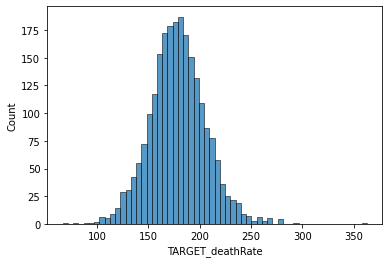

In [116]:
sns.histplot(cancer_data['TARGET_deathRate'])

Target variable is normally distributed but have outliers 

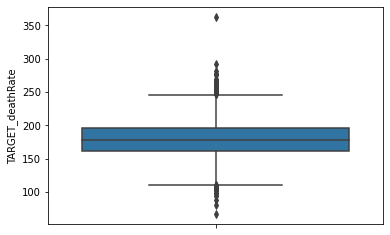

In [117]:
sns.boxplot(y=cancer_data['TARGET_deathRate'])

By this box we can see there is outlier in target value

In [118]:
cancer_data[cancer_data['TARGET_deathRate']>300]

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
528,214.0,61,1206.9,40207,15234,24.3,0.0,"(37413.8, 40362.7]",40.3,42.3,36.9,"Union County, Florida",2.58,36.4,27.0,45.1,NaN,0.0,37.4,5.5,NaN,11.7,59.6,49.2,41.0,35.8,22.5,73.964848,21.591732,0.645119,1.533803,50.012877,3.739774,362.8


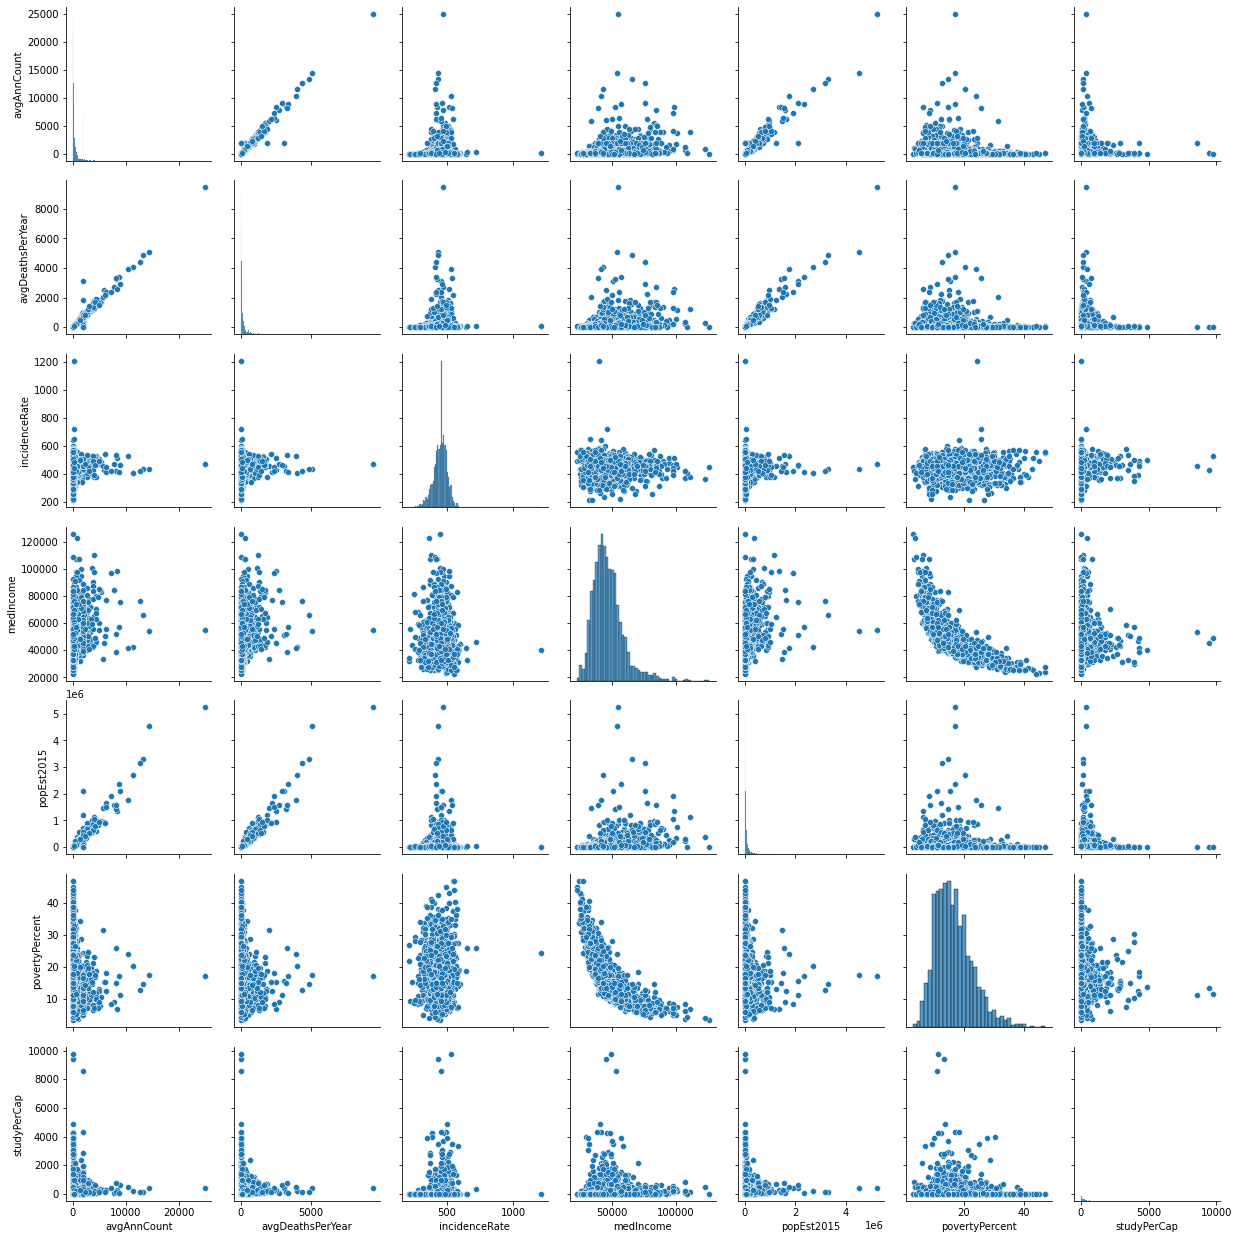

In [119]:
sns.pairplot(cancer_data.iloc[:,:8])
plt.show()

most of columns are right skewed and some are normally distributed.

In [120]:
corr_matrix=cancer_data.corr()
corr_matrix["TARGET_deathRate"].sort_values(ascending=False)

TARGET_deathRate           1.000000
incidenceRate              0.469213
PctPublicCoverageAlone     0.456076
povertyPercent             0.428083
PctPublicCoverage          0.418348
PctHS25_Over               0.406299
PctUnemployed16_Over       0.379586
PctHS18_24                 0.284848
PctBlack                   0.260477
PctNoHS18_24               0.076309
MedianAgeFemale            0.030528
MedianAge                  0.006193
MedianAgeMale             -0.005364
studyPerCap               -0.029654
AvgHouseholdSize          -0.037925
avgDeathsPerYear          -0.075079
BirthRate                 -0.085489
popEst2015                -0.115593
avgAnnCount               -0.138106
PctWhite                  -0.179109
PctOtherRace              -0.187207
PctAsian                  -0.202385
PctSomeCol18_24           -0.216487
PctEmpPrivCoverage        -0.259023
PercentMarried            -0.274256
PctBachDeg18_24           -0.288553
PctMarriedHouseholds      -0.307359
PctPrivateCoverageAlone   -0

1. Positive number indicate positively correlated.
2. Negative number indicate negatively correlated.
3. Zero indicate no relation.

### Separate the Input and Target Features of the data

In [121]:
X= cancer_data.drop(['TARGET_deathRate'], axis=1)
y= cancer_data['TARGET_deathRate']

Here X contains all features and y contain target series.

### Split the data into Train and Test Sets

In [122]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state= 32)

Here data is splited into train and test where train data is used to train model and test data is used to  evaluated model.
20 percent of whole data is used for testing and  80 percent for training the model.

In [123]:
X_train.shape

(1828, 33)

In [124]:
X_test.shape

(457, 33)

## Task 2

### Perform Data Preparation Steps

In [125]:
#Dropping object dtype columns
def drop_column(data):
  data=data.drop(['binnedInc', 'Geography','PctSomeCol18_24' ], axis=1)
  return data
X_train=drop_column(X_train)

In [126]:
def fillmissing(data):
  for column in list(data.columns):
    data= data.fillna(data[column].mean())
  return data
X_train=fillmissing(X_train)

In [127]:
#Applying same preprocessing to X_test
X_test= drop_column(X_test)
X_test=fillmissing(X_test)




## Task 3

### Build any Machine Learning Model of your choice

In [128]:
lrg= LinearRegression()
lrg.fit(X_train, y_train)
y_pred= lrg.predict(X_test)


### Evaluate your model with various Evaluation Metrics

In [129]:
print('MSE for train', mean_squared_error(y_train, lrg.predict(X_train)))
print('\n')
print('MSE for test',mean_squared_error(y_test, y_pred))
print('RMSE for test', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE for train 354.2521333967486


MSE for test 329.73407576817715
RMSE for test 18.158581325868415


### Try out other Machine Learning Models and Evaluate them

In [130]:
forest= RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
y_pred= forest.predict(X_test)

In [131]:
print('MSE for train', mean_squared_error(y_train, forest.predict(X_train)))
print('\n')

print('MSE for test', mean_squared_error(y_test, y_pred))
print('RMSE for test', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE for train 49.711454728118134


MSE for test 325.50670438074405
RMSE for test 18.04180435490708


## Task 4

### Perform Hyperparameter Tuning

In [132]:
rf= RandomForestRegressor(random_state=1)
from sklearn.model_selection import GridSearchCV
paragram={'bootstrap': [True],
'max_depth': [10, 20],
'min_samples_leaf': [3, 4],
'min_samples_split': [4, 6],
'n_estimators': [100, 200]
}
grid= GridSearchCV(rf, paragram, cv=3, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.5min finished


{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}


### Evaluate your model 

In [133]:
rf= RandomForestRegressor(random_state=1, bootstrap=True, max_depth=20, min_samples_leaf=3,  min_samples_split=4, n_estimators=200)
rf.fit(X_train, y_train)
print('MSE For train', mean_squared_error(y_train, rf.predict(X_train)))
print('\n')
print('MSE for test', mean_squared_error(y_test, rf.predict(X_test)))
print('RMSE for test', np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

MSE For train 86.8717348276541


MSE for test 316.1851845209761
RMSE for test 17.781596793341595


## Task 5

### Use any Feature Selection Technique and observe if the model created by selected features performs better than the previous model

In [134]:
!pip install Boruta

In [135]:
from sklearn.feature_selection import SelectFromModel


from boruta import BorutaPy

# define random forest regressor
forest = RandomForestRegressor(random_state=1)
 
forest.fit(X_train, y_train)
print('Baseline model')
print('mean squared error of train', mean_squared_error(y_train, forest.predict(X_train)))
print('mean squared error of test', mean_squared_error(y_test, forest.predict(X_test)))
print('RMSE of train', np.sqrt(mean_squared_error(y_train, forest.predict(X_train))))
print('RMSE of test', np.sqrt(mean_squared_error(y_test, forest.predict(X_test))))

Baseline model
mean squared error of train 49.711454728118134
mean squared error of test 325.50670438074405
RMSE of train 7.05063505849779
RMSE of test 18.04180435490708


In [136]:
# define Boruta feature selection method
# boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	11
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	11
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	11
Tentative: 	11
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	11
Tentative: 	11
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	13
Tentative: 	9
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	13
Tentative: 	9
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	13
Tentative: 	9
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	13
Tentative: 	9
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	14
Tentative: 	8
Rejected: 

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=61, n_jobs=None,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x7F9D9C839DB0,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random

In [137]:
# check selected features
print("Selected Features: ", boruta_selector.support_)
 
# check ranking of features
print("Ranking: ",boruta_selector.ranking_)

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [False  True  True  True  True  True False False False  True  True False
 False  True False  True  True  True  True  True False False False  True
 False  True False  True  True False]
Ranking:  [ 6  1  1  1  1  1 13 10 11  1  1  2  7  1  4  1  1  1  1  1 12  9  9  1
  4  1  5  1  1  2]
No. of significant features:  17


In [138]:
# Let's visualise it better in the form of a table
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
9,MedianAgeFemale,1
17,PctEmployed16_Over,1
16,PctBachDeg25_Over,1
15,PctHS25_Over,1
28,PctMarriedHouseholds,1
13,PctHS18_24,1
23,PctPublicCoverageAlone,1
10,AvgHouseholdSize,1
18,PctUnemployed16_Over,1
19,PctPrivateCoverage,1


In [139]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [140]:
# Create a new random forest regressor for the most important features
rf_important = RandomForestRegressor(n_estimators=10000, random_state=1, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [141]:
# Apply The Limited Featured regressor To The Test Data
y_important_pred = rf_important.predict(X_important_test)

print('mean squared error of train', mean_squared_error(y_train, rf_important.predict(X_important_train)))
print('RMSE of train', np.sqrt(mean_squared_error(y_train, rf_important.predict(X_important_train))))
print('\n')
print('mean squared error of test', mean_squared_error(y_test, rf_important.predict(X_important_test)))

print('RMSE of test', np.sqrt(mean_squared_error(y_test, rf_important.predict(X_important_test))))


mean squared error of train 47.01963624454887
RMSE of train 6.8570865711721085


mean squared error of test 317.7435412514737
RMSE of test 17.825362303512197


There is not any huge change by feature selection

In [142]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')

In [143]:
test_data= drop_column(test_data)
test_data= fillmissing(test_data)

In [145]:
X_important_test = boruta_selector.transform(np.array(test_data))

In [146]:
y_important_pred = rf_important.predict(X_important_test)

In [149]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(y_important_pred)
res.index = test_data.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction8.csv', index=False)         
files.download('prediction8.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>